In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
file_path = "matchups_combined.csv"

In [4]:
matchups = pd.read_csv(file_path)

In [5]:
matchups.reset_index(drop=True, inplace=True)

In [6]:
matchups.head()

,Unnamed: 0,TEAM NO,DUNKS FG%,DUNKS SHARE,DUNKS FG%D,DUNKS D SHARE,CLOSE TWOS FG%,BADJ EM_x,BADJ O_x,BADJ D_x,...,BARTHAG_x_o,BADJ EM_y_o,BADJ O_y_o,BADJ D_y_o,BARTHAG_y_o,YEAR_o,SEED_o,CURRENT ROUND_o,GAME ID_o,UPSET
0,0,1011,88.7,13.0,85.2,5.3,60.7,33.0,121.6,88.6,...,0.468,-2.0,102.4,104.4,0.445,2023,16,64,74,-1
1,1,979,80.2,6.7,86.7,5.8,59.9,20.8,118.1,97.3,...,0.914,17.6,114.8,97.2,0.871,2023,9,64,75,-1
2,2,961,87.5,7.8,75.0,5.4,61.5,25.7,113.8,88.1,...,0.819,9.4,108.1,98.7,0.740,2023,12,64,76,-1
3,3,946,89.7,9.4,81.5,5.2,60.6,19.3,110.8,91.5,...,0.640,9.5,112.6,103.1,0.734,2023,13,64,77,1
4,4,1001,94.7,10.4,78.9,4.3,63.6,26.3,115.7,89.4,...,0.840,15.2,113.0,97.8,0.840,2023,11,64,78,-1


In [7]:
matchups.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
X = matchups.drop(columns=['OUTCOME', "TEAM", "ROUND", "BY YEAR NO", "BY ROUND NO", "SCORE", "UPSET"])
y = matchups['UPSET']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [38]:
X_val.shape

(164, 36)

In [39]:
X_test.shape

(164, 36)

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [40]:
X_train.shape

(768, 36)

In [13]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [14]:
def create_baseline():
    model = Sequential()
    model.add(Dense(128, input_shape=(36,), activation='relu'))
    model.add(Dense(128, input_shape=(128,), activation='relu'))
    model.add(Dense(128, input_shape=(128,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
param_grid = {
    'epochs': [100, 200, 300],
    'batch_size': [8, 16, 32, 64]
}

In [16]:
estimator = KerasClassifier(model=create_baseline, epochs=200, batch_size=10, verbose=1)

In [17]:
# grid = GridSearchCV(estimator, param_grid, cv=3)
# grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val))



Epoch 1/100


64/64 [==============================] - 4s 11ms/step - loss: 0.6870 - accuracy: 0.5391 - val_loss: 0.9207 - val_accuracy: 0.1890
Epoch 2/100
64/64 [==============================] - 0s 4ms/step - loss: 0.6243 - accuracy: 0.6777 - val_loss: 0.5199 - val_accuracy: 0.1646
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 0.5844 - accuracy: 0.6914 - val_loss: 0.1639 - val_accuracy: 0.1524
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.5442 - accuracy: 0.7148 - val_loss: 0.2344 - val_accuracy: 0.1829
Epoch 5/100
64/64 [==============================] - 0s 5ms/step - loss: 0.5271 - accuracy: 0.7246 - val_loss: 0.5837 - val_accuracy: 0.2012
Epoch 6/100
64/64 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.7852 - val_loss: -0.6824 - val_accuracy: 0.1585
Epoch 7/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4674 - accuracy: 0.7715 - val_loss: -1.2927 - val_accuracy: 0.0976
Epoch 

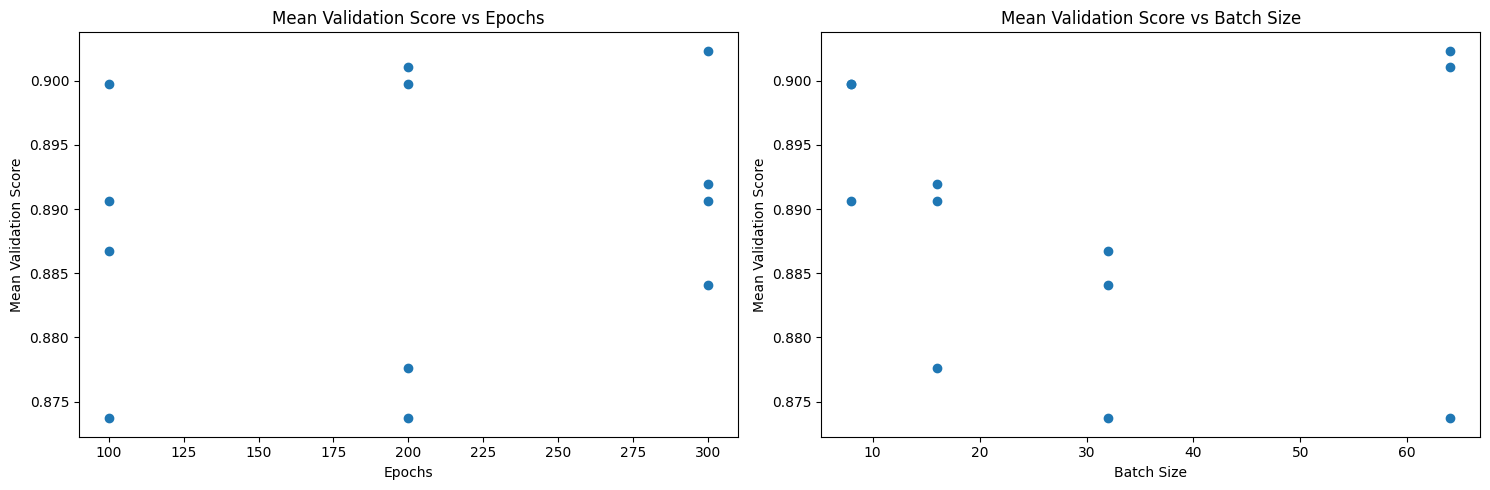

In [18]:
# import matplotlib.pyplot as plt
# import numpy as np

# mean_scores = grid_result.cv_results_['mean_test_score']
# params = grid_result.cv_results_['params']

# epochs = [param['epochs'] for param in params]
# batch_sizes = [param['batch_size'] for param in params]

# fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# axs[0].scatter(epochs, mean_scores)
# axs[0].set_xlabel('Epochs')
# axs[0].set_ylabel('Mean Validation Score')
# axs[0].set_title('Mean Validation Score vs Epochs')

# axs[1].scatter(batch_sizes, mean_scores)
# axs[1].set_xlabel('Batch Size')
# axs[1].set_ylabel('Mean Validation Score')
# axs[1].set_title('Mean Validation Score vs Batch Size')

# plt.tight_layout()
# plt.show()

In [19]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.902344 using {'batch_size': 64, 'epochs': 300}
0.899740 (0.015733) with: {'batch_size': 8, 'epochs': 100}
0.899740 (0.014731) with: {'batch_size': 8, 'epochs': 200}
0.890625 (0.019401) with: {'batch_size': 8, 'epochs': 300}
0.890625 (0.016877) with: {'batch_size': 16, 'epochs': 100}
0.877604 (0.013279) with: {'batch_size': 16, 'epochs': 200}
0.891927 (0.012075) with: {'batch_size': 16, 'epochs': 300}
0.886719 (0.016877) with: {'batch_size': 32, 'epochs': 100}
0.873698 (0.021710) with: {'batch_size': 32, 'epochs': 200}
0.884115 (0.020256) with: {'batch_size': 32, 'epochs': 300}
0.873698 (0.058492) with: {'batch_size': 64, 'epochs': 100}
0.901042 (0.016367) with: {'batch_size': 64, 'epochs': 200}
0.902344 (0.011500) with: {'batch_size': 64, 'epochs': 300}


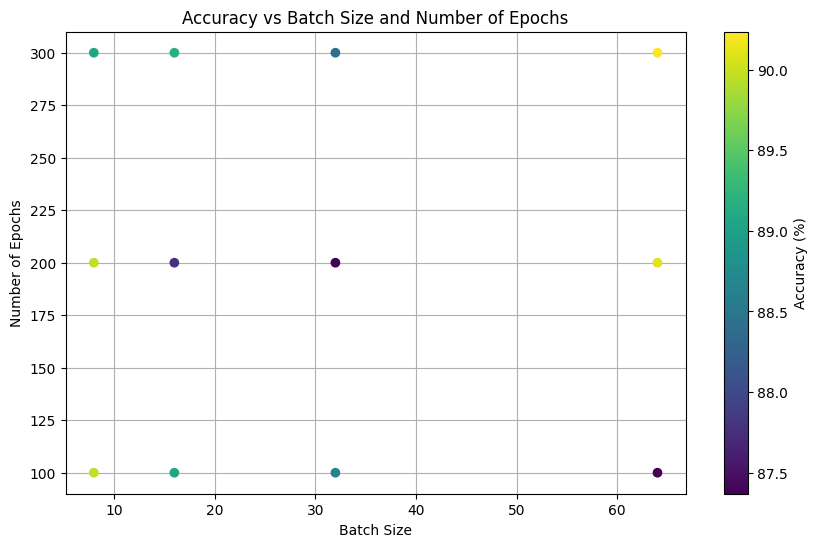

In [20]:
# mean_scores = grid_result.cv_results_['mean_test_score']
# params = grid_result.cv_results_['params']

# epochs = np.array([param['epochs'] for param in params])
# batch_sizes = np.array([param['batch_size'] for param in params])
# accuracy = mean_scores * 100  

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(batch_sizes, epochs, c=accuracy, cmap='viridis', marker='o', zorder=2)

# cbar = plt.colorbar(scatter)
# cbar.set_label('Training Accuracy (%)')
# plt.xlabel('Batch Size')
# plt.ylabel('Number of Epochs')
# plt.title('Accuracy vs Batch Size and Number of Epochs')

# plt.grid(True)
# plt.show()

In [21]:
# best_model = grid_result.best_estimator_.model

In [34]:
model = KerasClassifier(model=create_baseline, epochs=300, batch_size=64, verbose=1)

In [35]:
best_model = model.fit(X_train, y_train, validation_data=(X_val, y_val))

Epoch 1/300
12/12 [==============================] - 1s 18ms/step - loss: 0.6813 - accuracy: 0.5755 - val_loss: 0.7246 - val_accuracy: 0.1768
Epoch 2/300
12/12 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6615 - val_loss: 0.6334 - val_accuracy: 0.1524
Epoch 3/300
12/12 [==============================] - 0s 5ms/step - loss: 0.6237 - accuracy: 0.6576 - val_loss: 0.0687 - val_accuracy: 0.0854
Epoch 4/300
12/12 [==============================] - 0s 5ms/step - loss: 0.5867 - accuracy: 0.7253 - val_loss: 0.2097 - val_accuracy: 0.1341
Epoch 5/300
12/12 [==============================] - 0s 10ms/step - loss: 0.5528 - accuracy: 0.7188 - val_loss: 0.3688 - val_accuracy: 0.1707
Epoch 6/300
12/12 [==============================] - 0s 6ms/step - loss: 0.5382 - accuracy: 0.7396 - val_loss: 0.3653 - val_accuracy: 0.1707
Epoch 7/300
12/12 [==============================] - 0s 6ms/step - loss: 0.4949 - accuracy: 0.7617 - val_loss: -0.2903 - val_accuracy: 0.1524
Epoch 8/30

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

3/3 [==============================] - 0s 3ms/step
Accuracy: 0.7682926829268293
F1 Score: 0.36666666666666664
Classification Report:
              precision    recall  f1-score   support

          -1       0.86      0.85      0.86       135
           1       0.35      0.38      0.37        29

    accuracy                           0.77       164
   macro avg       0.61      0.62      0.61       164
weighted avg       0.77      0.77      0.77       164

Confusion Matrix:
[[115  20]
 [ 18  11]]


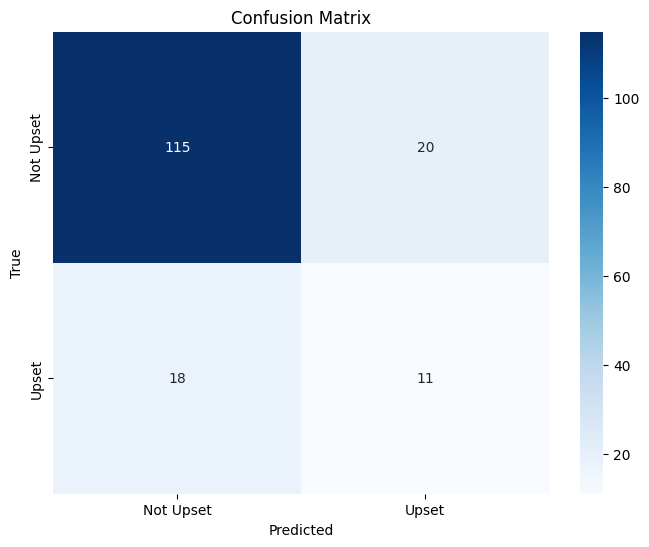

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)

classes = ['Not Upset', 'Upset']  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()